Loading libraries

In [1]:
import pandas as pd
import altair as alt
import datetime
import numpy as np
import glob
from datetime import datetime
import selenium
from IPython.display import display
alt.renderers.enable('notebook')
print(alt.renderers.active)
import jenkspy

notebook


Reading in the summer temperature for bigger cities in CH since 1960

In [2]:
jenksdata=pd.read_csv("../RawData/Jenks_basis.csv")
jenksdata

,Jahr,Lugano,Basel-Binningen,Genève-Cointrin,Luzern,Sion,Bern-Zollikofen,Zürich-Fluntern,St. Gallen
0,1960,18.73,16.80,17.37,16.00,17.23,15.40,15.97,14.60
1,1961,19.70,16.97,17.57,16.43,17.87,15.77,16.20,14.73
2,1962,20.20,17.37,18.17,16.60,18.67,16.37,16.67,14.90
3,1963,19.23,17.27,17.30,16.40,17.70,15.80,16.47,15.03
4,1964,20.13,18.37,18.90,17.50,18.87,17.03,17.47,15.87
5,1965,19.43,16.70,17.00,15.77,16.90,15.33,15.60,14.27
6,1966,19.00,16.63,17.67,15.83,17.37,15.60,15.57,14.27
7,1967,20.40,17.53,18.10,17.03,18.50,16.63,16.70,15.50
8,1968,18.63,16.70,17.00,15.80,17.47,15.23,15.77,14.37
9,1969,19.37,16.77,17.27,15.97,17.23,15.40,15.87,14.33


Reducing it to the city that we want to show in the graphic

In [3]:
jenksdata=jenksdata[["Lugano","Genève-Cointrin","Sion","Bern-Zollikofen","Zürich-Fluntern","St. Gallen"]]

Calculating a jenks scale for these cities

In [4]:
jenksdatalist= jenksdata.values.tolist()
flat_list = [item for sublist in jenksdatalist for item in sublist]

UKbreaks = jenkspy.jenks_breaks(flat_list, nb_class=7)
UKbreaks

[13.9, 15.63, 16.7, 17.77, 18.8, 19.9, 21.3, 24.2]

Now we create for each city a graphic as follows

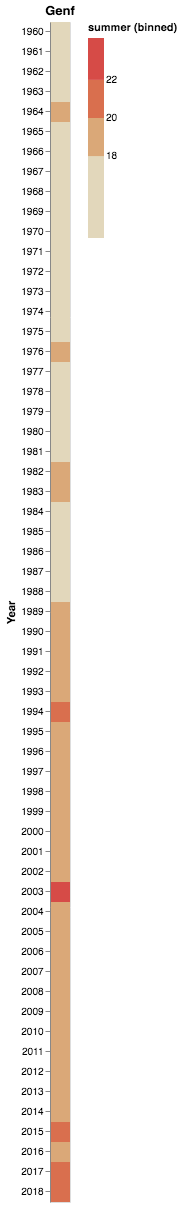

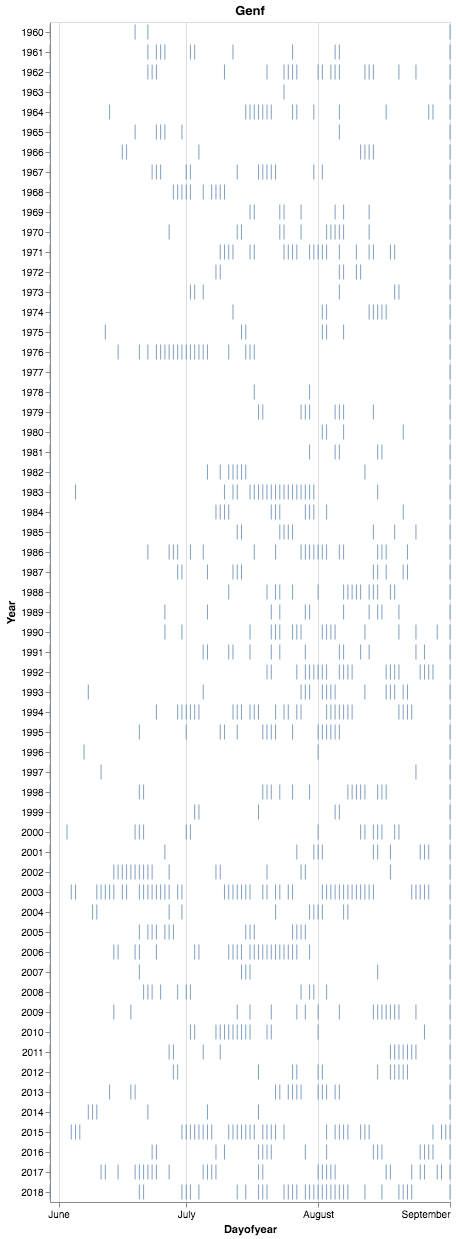

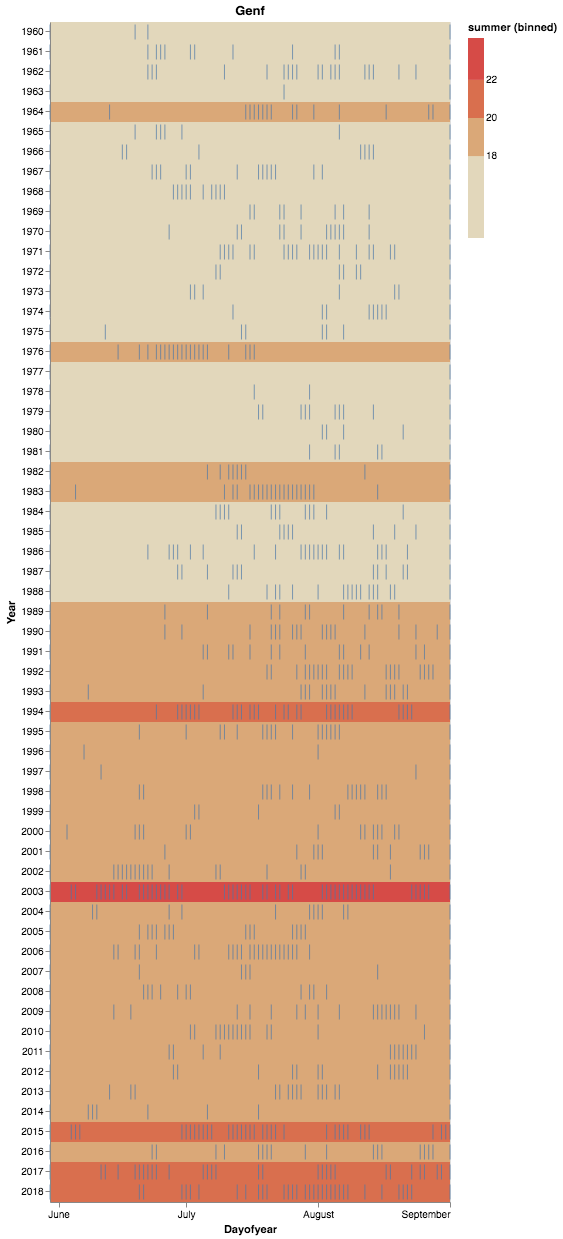

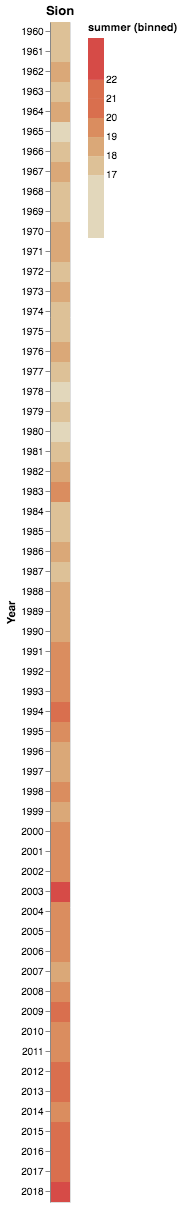

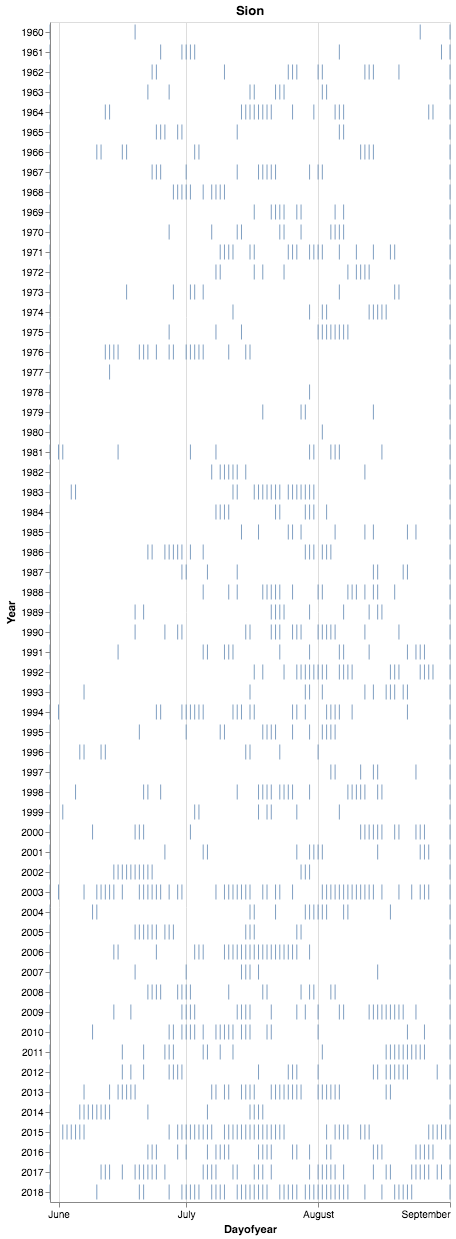

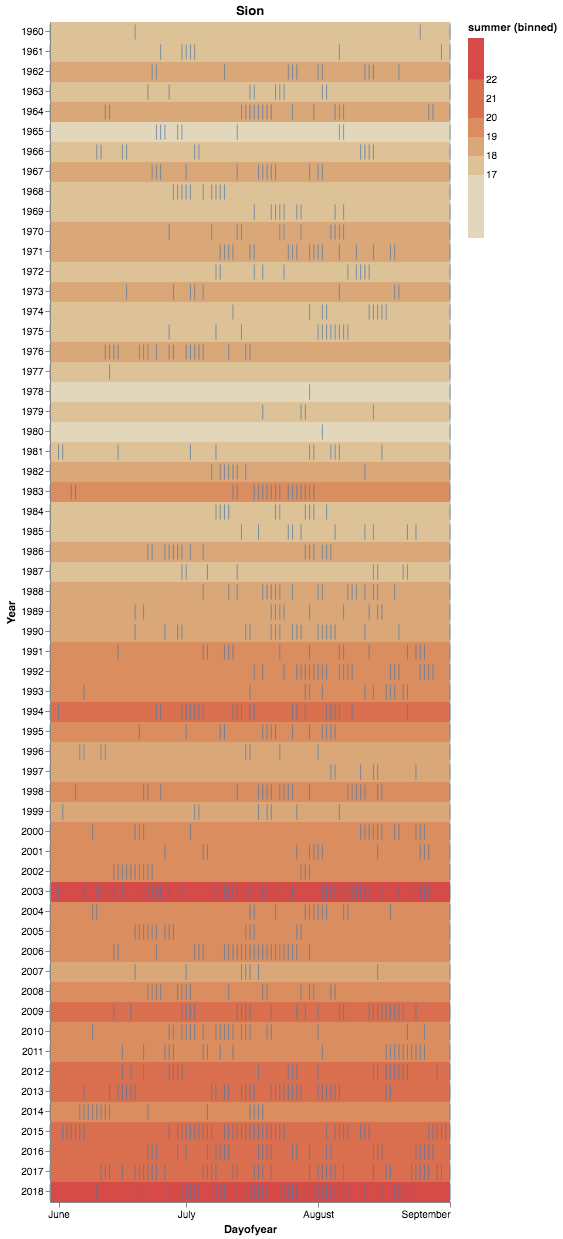

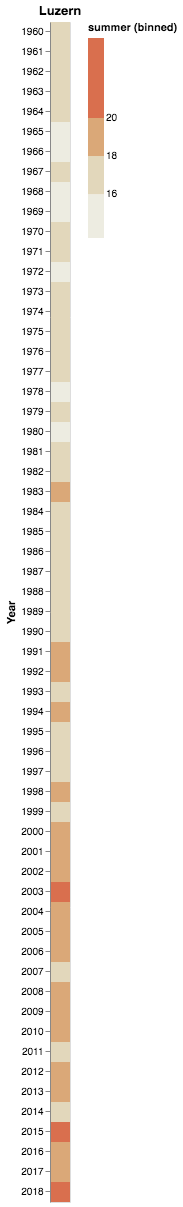

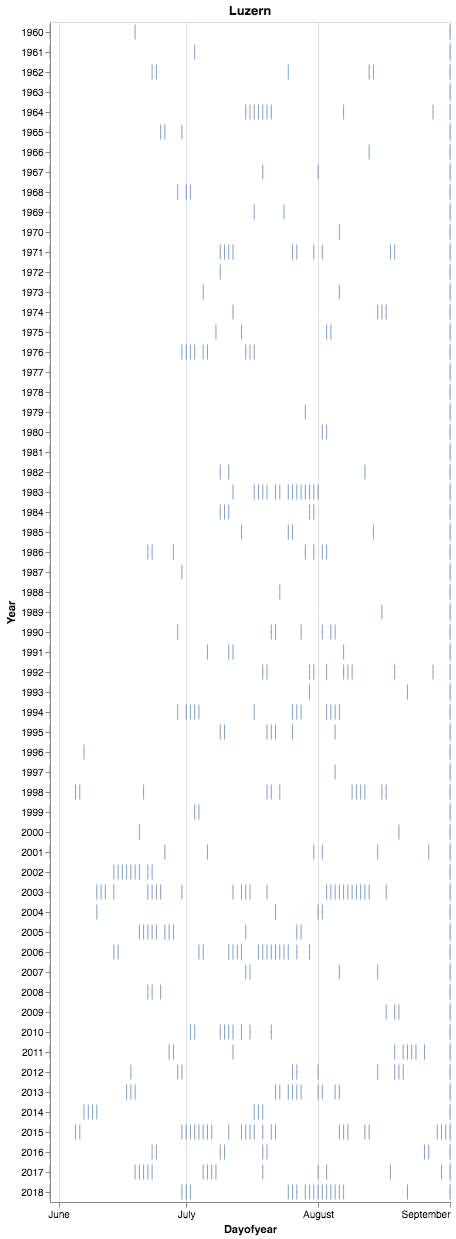

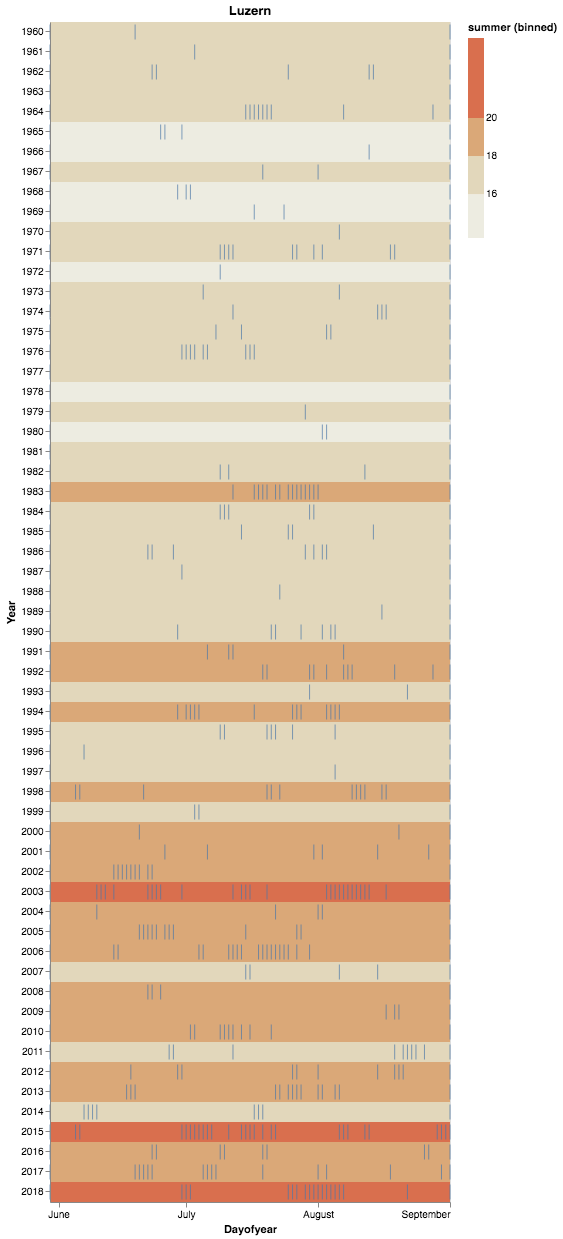

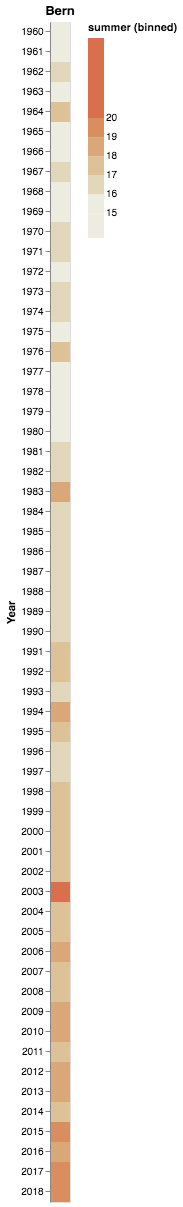

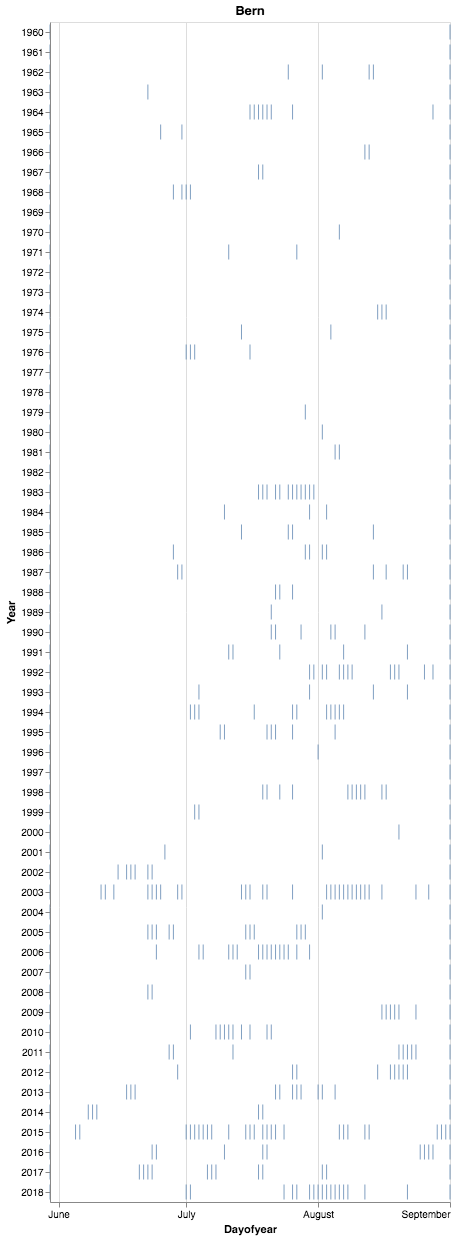

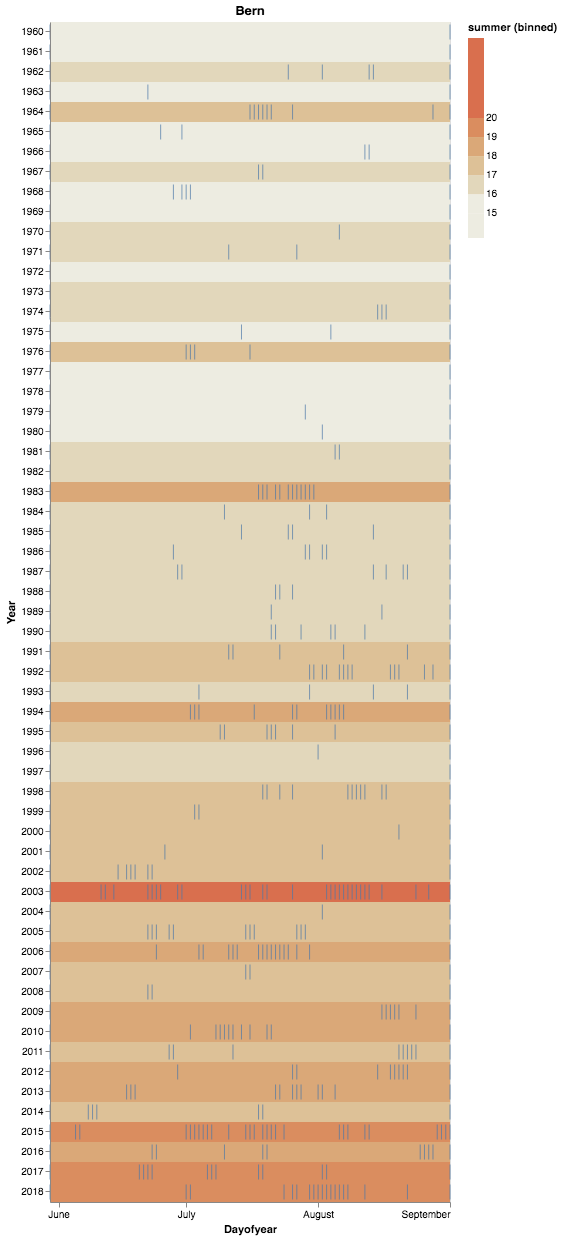

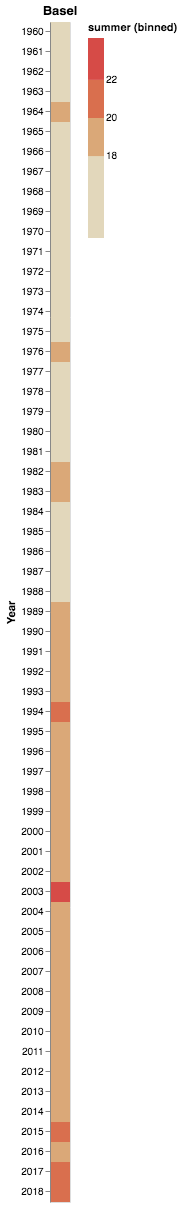

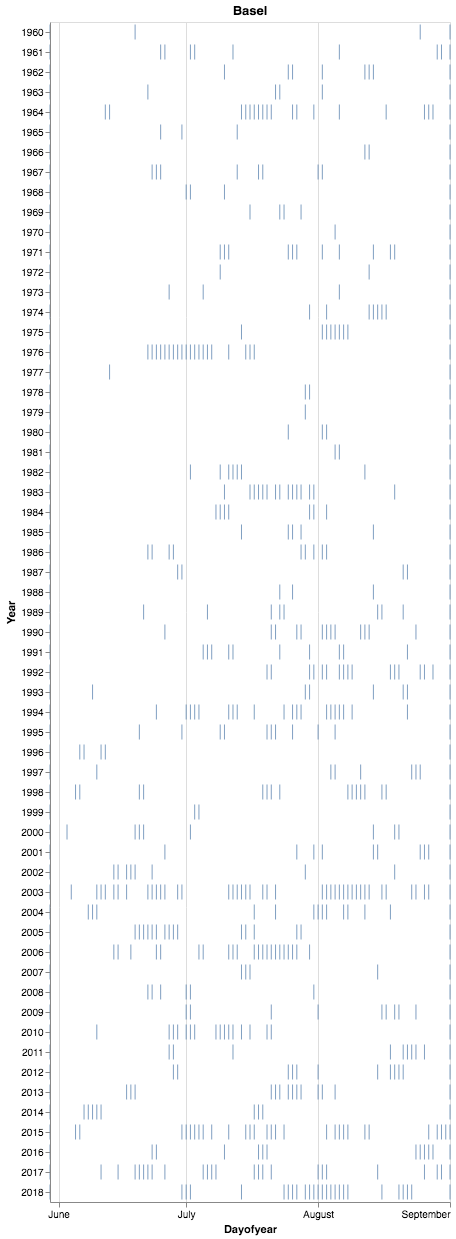

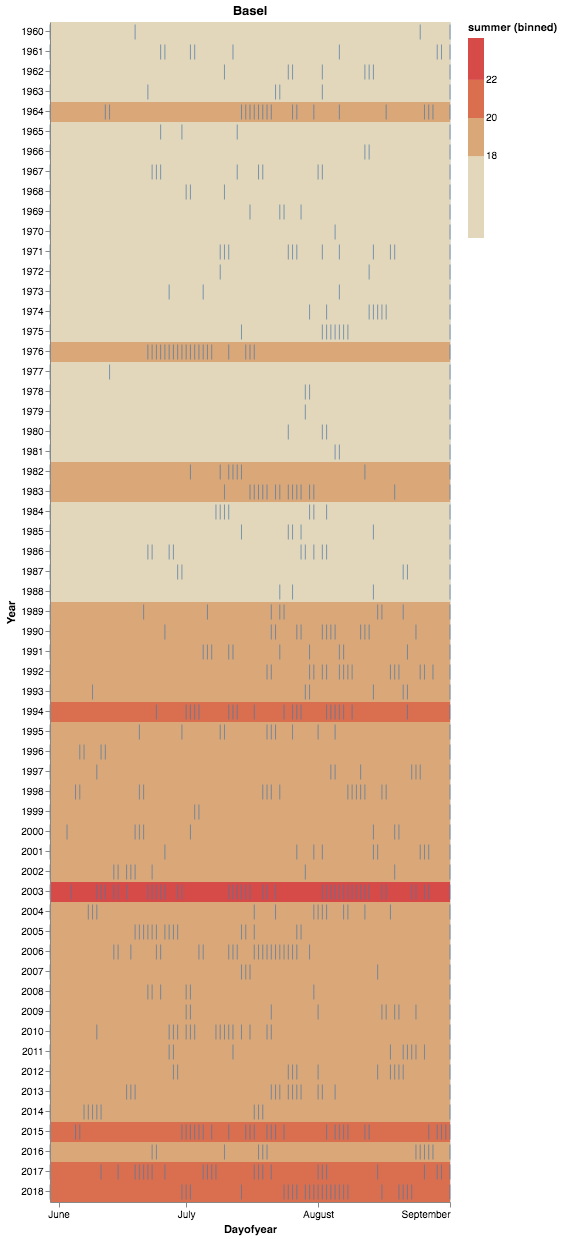

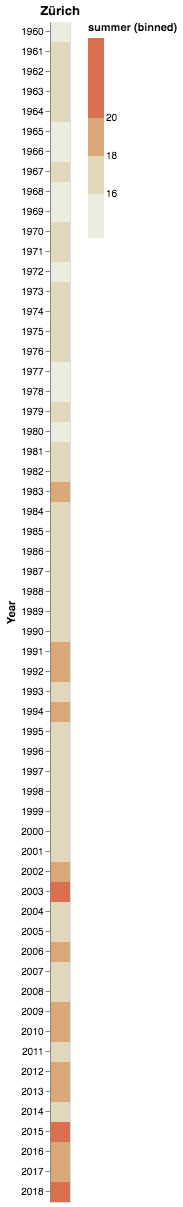

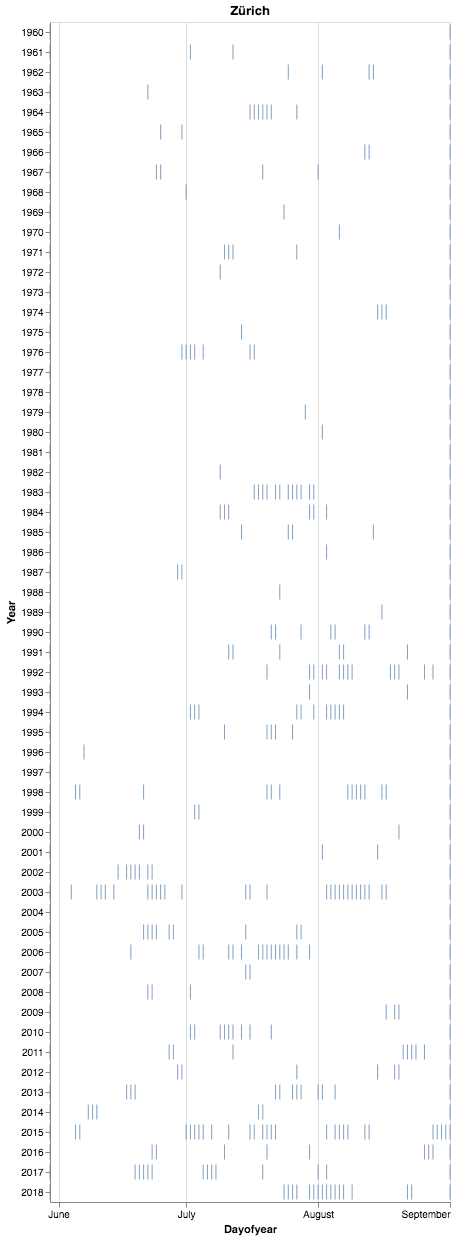

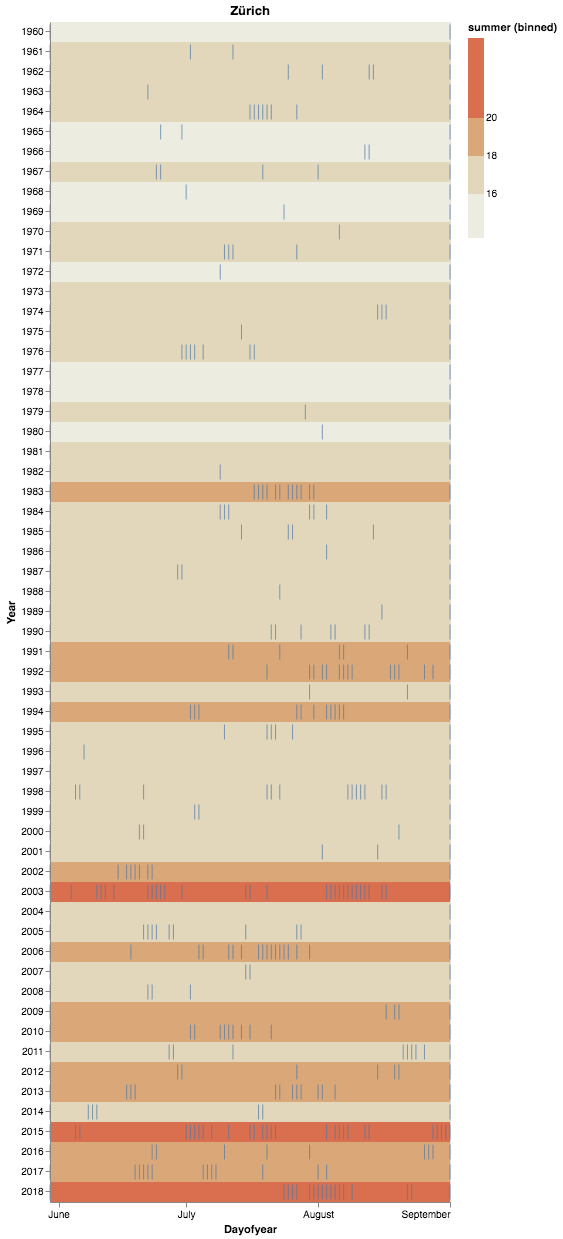

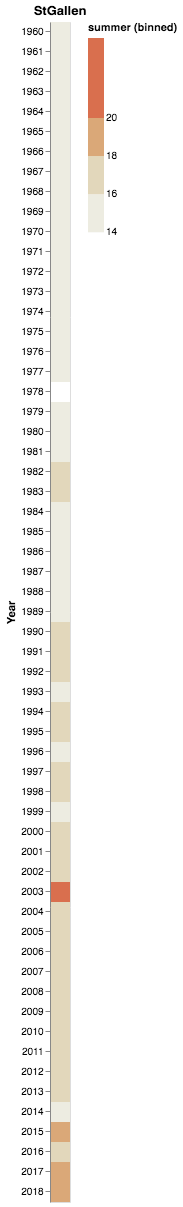

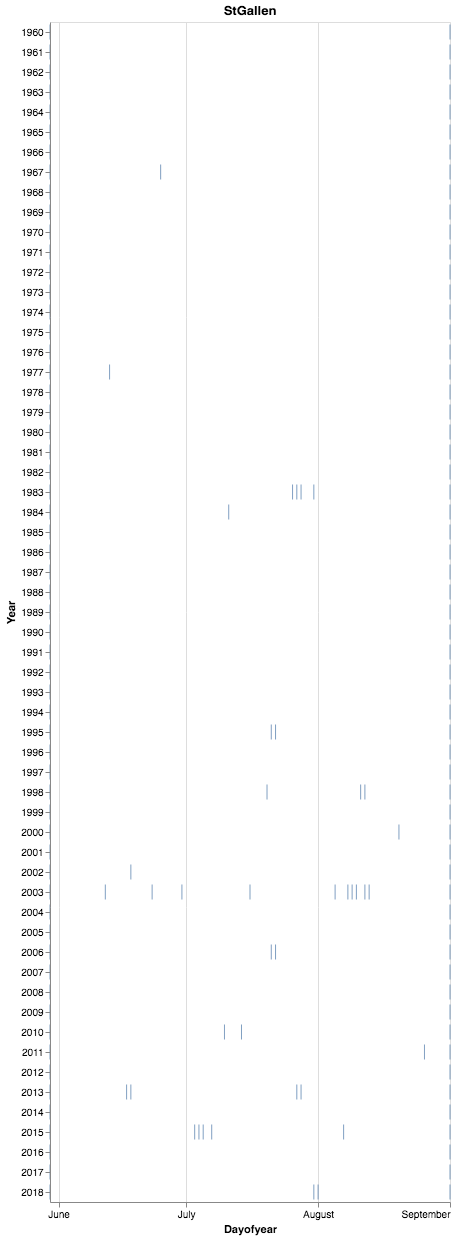

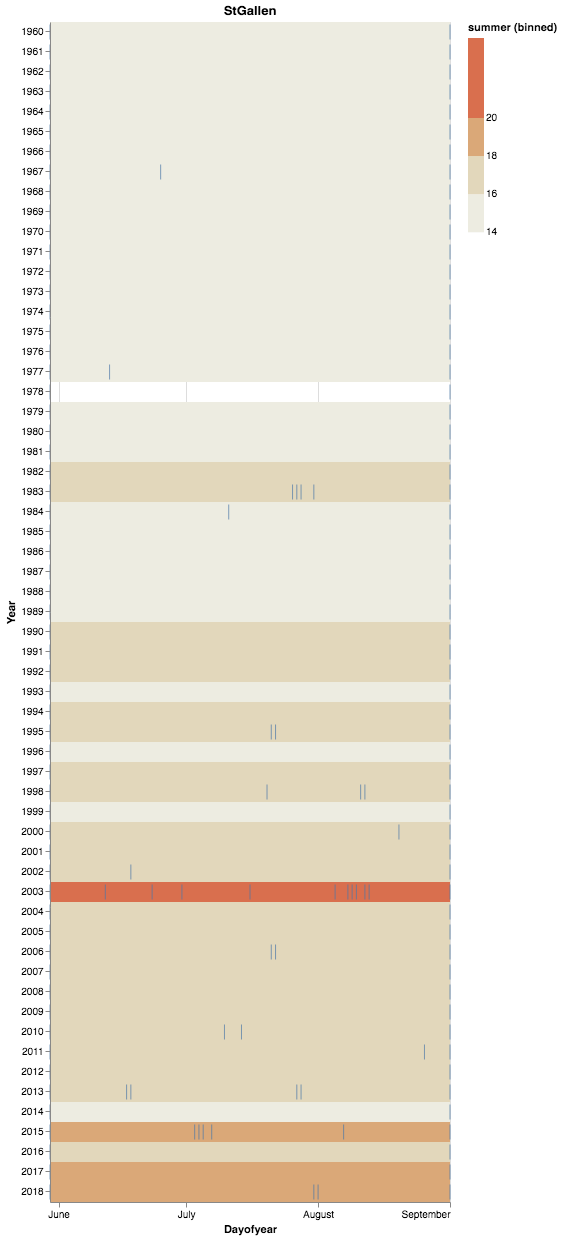

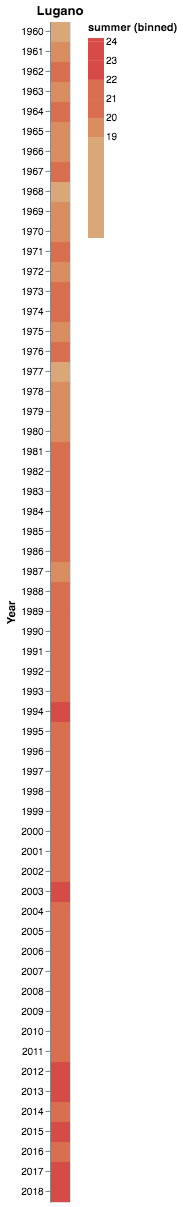

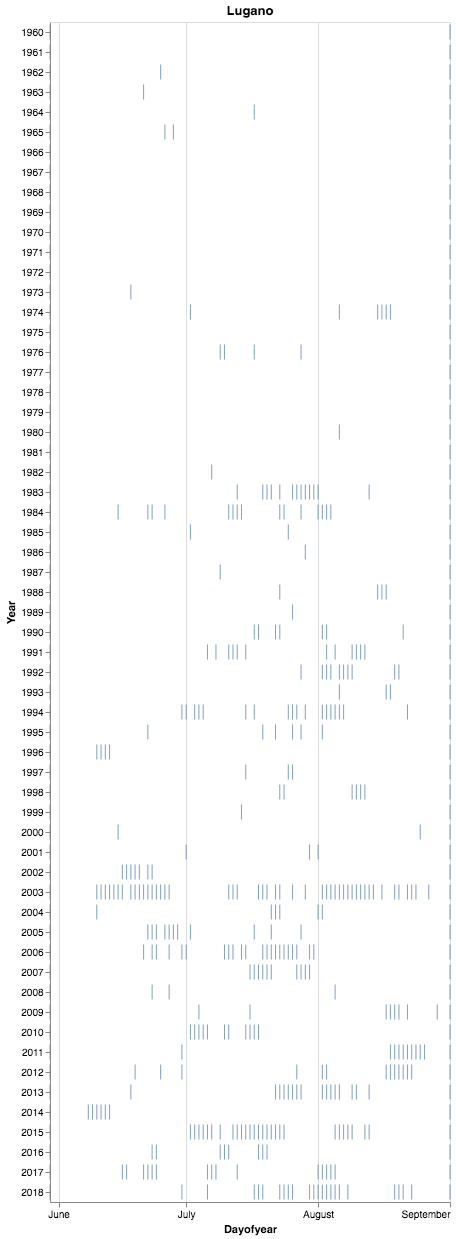

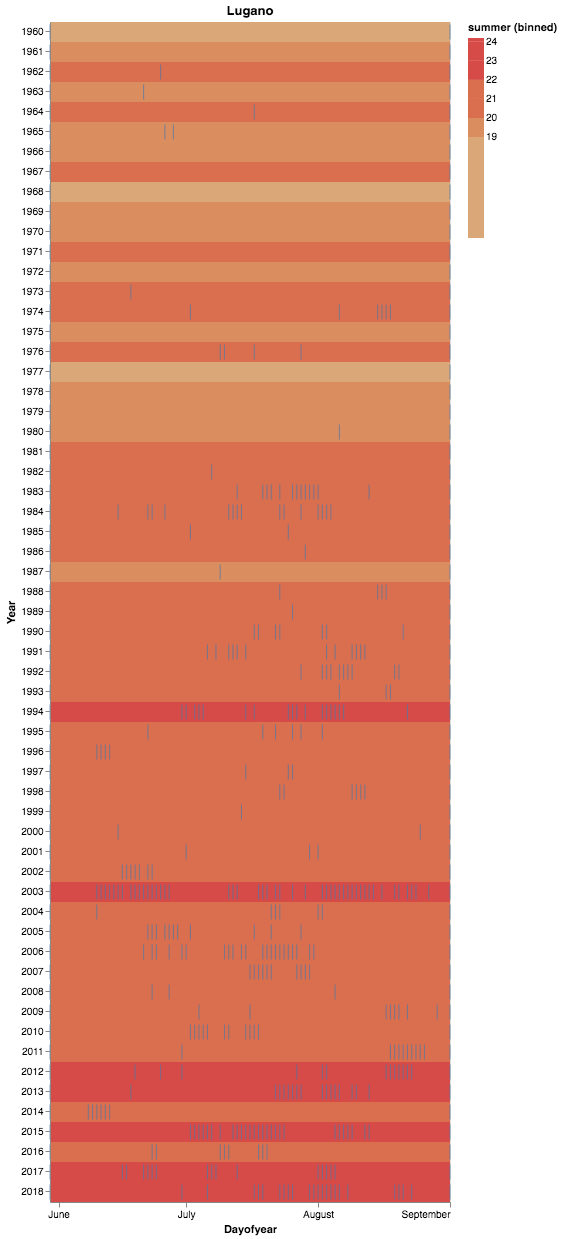

In [5]:
#we read in for each cities the csv-file that lists up all the heat days (30 degrees and more)
for filename in glob.glob("../RawData/cities/*"):
    data_hitz=pd.read_csv(filename)
    
    #keep the cityname
    stadtname=(filename[18:-4])

    #Extract Year, Day and Month and month
    data_hitz["Datum"] = pd.to_datetime(data_hitz["Datum"] ,format="%m/%d/%Y")
    data_hitz["Year"] = data_hitz["Datum"].dt.strftime('%Y')
    data_hitz["Dayofyear"] = data_hitz["Datum"].dt.strftime('%m-%d')
    data_hitz["Month"] = pd.to_numeric(data_hitz["Datum"].dt.strftime('%m'))
    
    #then reduce the listed heat days only to the ones that occured between June and August  
    data_hitz=data_hitz[data_hitz["Month"]>5]
    data_hitz=data_hitz[data_hitz["Month"]<9]

    #then we go over all years between 1960 and add two entries that mark the start and end of the summer
    #this we do because:
    #a) we want even for years without heatdays an entry so that there is a row on the plot
    #b) this was the quick fix to make sure that the x-scale of the plot goes from June to August
    for i in list(range(1960,2019)):
        i=(str(i))
        data_hitz = data_hitz.append({'Year' : i, "Dayofyear":"05-30"} , ignore_index=True)
        data_hitz = data_hitz.append({'Year' : i, "Dayofyear":"09-01"} , ignore_index=True)

    #then we read out for the same city the average summer temperature
    data_temp=pd.read_csv("../RawData/summer_incities/"+stadtname+".csv")
    data_temp["Year"]=pd.to_datetime(data_temp["Year"],format="%Y")
    data_temp["Year"] = data_temp["Year"].dt.strftime('%Y')

    #and combine the two datasets
    combined_hitz_temp=pd.merge(data_hitz, data_temp, right_on="Year", left_on="Year",how="inner")
    
    #but throw out 2019 data because summer has not ended yet
    combined_hitz_temp=combined_hitz_temp[combined_hitz_temp["Year"]!=str(2019)]
    
    #then we define the axisticks for our charts
    axislist=["06-01","07-01","08-01","09-01"]
    
    # we first produce the stripplot with the strips for each heatday for each year
    heatdays=alt.Chart(combined_hitz_temp,title=stadtname).mark_tick().encode(
        alt.X('Dayofyear:T', axis=alt.Axis(values=axislist)),
        y="Year:O",
    )
    
    #second we produce the heatmap for each year
    heatmap = alt.Chart(combined_hitz_temp,title=stadtname).mark_rect().encode(
    alt.Y('Year:O'),
    alt.Color('summer:Q',bin=True, scale=alt.Scale(
        #here we use our predefined jenks scale and our NZZ visuals styleguide colour scale
            domain=[13.7, 15.63, 16.7, 17.77, 18.8, 19.9, 21.3, 24.2],
            range=["#EDECE1","#e2d7bb","#ddc197","#daa878","#da8d5f","#d96f4e","#d64b47"])
    ))
    heatmap
    
    #display them both
    heatmap.display()
    heatdays.display()
    
    #then we combine both with a simple plus
    combined=heatmap + heatdays
    
    #and voila we export and show the combination
    combined.display()
    combined.save("../Vis/"+stadtname+"_jenks.svg")

Now our graphics designer can finetune these charts without having to go over so  many details.